In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb44c4dbbe0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb44c4db0b8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb44c4dbbe0>)


Epoch 1: 3.9s to complete
    error(train)=1.64e+00, acc(train)=5.56e-01, error(valid)=1.67e+00, acc(valid)=5.45e-01


Epoch 2: 3.8s to complete
    error(train)=1.26e+00, acc(train)=6.47e-01, error(valid)=1.29e+00, acc(valid)=6.35e-01


Epoch 3: 3.8s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.15e+00, acc(valid)=6.70e-01


Epoch 4: 3.8s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.05e+00, acc(valid)=6.95e-01


Epoch 5: 3.8s to complete
    error(train)=9.43e-01, acc(train)=7.26e-01, error(valid)=9.80e-01, acc(valid)=7.13e-01


Epoch 6: 3.8s to complete
    error(train)=8.89e-01, acc(train)=7.41e-01, error(valid)=9.31e-01, acc(valid)=7.24e-01


Epoch 7: 3.9s to complete
    error(train)=8.36e-01, acc(train)=7.54e-01, error(valid)=8.79e-01, acc(valid)=7.36e-01


Epoch 8: 4.0s to complete
    error(train)=7.98e-01, acc(train)=7.64e-01, error(valid)=8.48e-01, acc(valid)=7.42e-01


Epoch 9: 4.0s to complete
    error(train)=7.64e-01, acc(train)=7.73e-01, error(valid)=8.17e-01, acc(valid)=7.53e-01


Epoch 10: 4.0s to complete
    error(train)=7.29e-01, acc(train)=7.81e-01, error(valid)=7.84e-01, acc(valid)=7.58e-01


Epoch 11: 4.1s to complete
    error(train)=6.99e-01, acc(train)=7.90e-01, error(valid)=7.57e-01, acc(valid)=7.66e-01


Epoch 12: 4.1s to complete
    error(train)=6.79e-01, acc(train)=7.94e-01, error(valid)=7.40e-01, acc(valid)=7.71e-01


Epoch 13: 4.1s to complete
    error(train)=6.58e-01, acc(train)=8.00e-01, error(valid)=7.20e-01, acc(valid)=7.77e-01


Epoch 14: 4.1s to complete
    error(train)=6.39e-01, acc(train)=8.03e-01, error(valid)=7.07e-01, acc(valid)=7.79e-01


Epoch 15: 4.0s to complete
    error(train)=6.25e-01, acc(train)=8.07e-01, error(valid)=6.94e-01, acc(valid)=7.83e-01


Epoch 16: 4.0s to complete
    error(train)=6.10e-01, acc(train)=8.11e-01, error(valid)=6.84e-01, acc(valid)=7.85e-01


Epoch 17: 4.1s to complete
    error(train)=5.97e-01, acc(train)=8.14e-01, error(valid)=6.74e-01, acc(valid)=7.86e-01


Epoch 18: 4.2s to complete
    error(train)=5.85e-01, acc(train)=8.17e-01, error(valid)=6.65e-01, acc(valid)=7.90e-01


Epoch 19: 4.1s to complete
    error(train)=5.71e-01, acc(train)=8.22e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01


Epoch 20: 4.2s to complete
    error(train)=5.63e-01, acc(train)=8.22e-01, error(valid)=6.46e-01, acc(valid)=7.97e-01


Epoch 21: 4.3s to complete
    error(train)=5.55e-01, acc(train)=8.23e-01, error(valid)=6.42e-01, acc(valid)=7.94e-01


Epoch 22: 4.2s to complete
    error(train)=5.51e-01, acc(train)=8.25e-01, error(valid)=6.38e-01, acc(valid)=8.00e-01


Epoch 23: 4.2s to complete
    error(train)=5.41e-01, acc(train)=8.29e-01, error(valid)=6.33e-01, acc(valid)=8.04e-01


Epoch 24: 4.1s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=6.30e-01, acc(valid)=8.01e-01


Epoch 25: 4.1s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=6.19e-01, acc(valid)=8.07e-01


Epoch 26: 4.1s to complete
    error(train)=5.17e-01, acc(train)=8.36e-01, error(valid)=6.14e-01, acc(valid)=8.09e-01


Epoch 27: 4.1s to complete
    error(train)=5.07e-01, acc(train)=8.38e-01, error(valid)=6.09e-01, acc(valid)=8.07e-01


Epoch 28: 4.0s to complete
    error(train)=4.99e-01, acc(train)=8.39e-01, error(valid)=6.04e-01, acc(valid)=8.10e-01


Epoch 29: 4.0s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=6.06e-01, acc(valid)=8.11e-01


Epoch 30: 4.0s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=6.01e-01, acc(valid)=8.10e-01


Epoch 31: 4.1s to complete
    error(train)=4.87e-01, acc(train)=8.42e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


Epoch 32: 4.3s to complete
    error(train)=4.80e-01, acc(train)=8.44e-01, error(valid)=5.96e-01, acc(valid)=8.10e-01


Epoch 33: 4.3s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


Epoch 34: 4.2s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 35: 4.2s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.89e-01, acc(valid)=8.13e-01


Epoch 36: 4.1s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 37: 4.1s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.83e-01, acc(valid)=8.16e-01


Epoch 38: 4.1s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


Epoch 39: 4.2s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=5.83e-01, acc(valid)=8.16e-01


Epoch 40: 4.1s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


Epoch 41: 4.1s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


Epoch 42: 4.2s to complete
    error(train)=4.41e-01, acc(train)=8.57e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


Epoch 43: 4.1s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.78e-01, acc(valid)=8.20e-01


Epoch 44: 4.1s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


Epoch 45: 4.1s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.71e-01, acc(valid)=8.20e-01


Epoch 46: 4.1s to complete
    error(train)=4.23e-01, acc(train)=8.62e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


Epoch 47: 4.1s to complete
    error(train)=4.23e-01, acc(train)=8.61e-01, error(valid)=5.74e-01, acc(valid)=8.19e-01


Epoch 48: 4.1s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 49: 4.2s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 50: 4.2s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 51: 4.2s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.70e-01, acc(valid)=8.21e-01


Epoch 52: 4.4s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


Epoch 53: 4.5s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 54: 4.7s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 55: 4.5s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.75e-01, acc(valid)=8.19e-01


Epoch 56: 4.3s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=5.66e-01, acc(valid)=8.23e-01


Epoch 57: 4.2s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 58: 4.1s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 59: 4.0s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 60: 4.0s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 61: 4.1s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.64e-01, acc(valid)=8.23e-01


Epoch 62: 4.1s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


Epoch 63: 4.1s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 64: 4.1s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


Epoch 65: 4.1s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 66: 4.1s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 67: 4.1s to complete
    error(train)=3.69e-01, acc(train)=8.75e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


Epoch 68: 4.2s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.68e-01, acc(valid)=8.23e-01


Epoch 69: 4.2s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 70: 4.2s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.69e-01, acc(valid)=8.23e-01


Epoch 71: 4.1s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=5.73e-01, acc(valid)=8.21e-01


Epoch 72: 4.0s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.71e-01, acc(valid)=8.22e-01


Epoch 73: 4.1s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.68e-01, acc(valid)=8.24e-01


Epoch 74: 4.2s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


Epoch 75: 4.1s to complete
    error(train)=3.52e-01, acc(train)=8.82e-01, error(valid)=5.68e-01, acc(valid)=8.23e-01


Epoch 76: 4.1s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.71e-01, acc(valid)=8.21e-01


Epoch 77: 4.0s to complete
    error(train)=3.51e-01, acc(train)=8.81e-01, error(valid)=5.74e-01, acc(valid)=8.21e-01


Epoch 78: 4.1s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.73e-01, acc(valid)=8.20e-01


Epoch 79: 4.1s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=5.73e-01, acc(valid)=8.21e-01


Epoch 80: 4.2s to complete
    error(train)=3.44e-01, acc(train)=8.84e-01, error(valid)=5.71e-01, acc(valid)=8.23e-01


Epoch 81: 4.0s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.72e-01, acc(valid)=8.23e-01


Epoch 82: 4.0s to complete
    error(train)=3.39e-01, acc(train)=8.85e-01, error(valid)=5.76e-01, acc(valid)=8.22e-01


Epoch 83: 4.1s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.73e-01, acc(valid)=8.22e-01


Epoch 84: 4.0s to complete
    error(train)=3.37e-01, acc(train)=8.86e-01, error(valid)=5.73e-01, acc(valid)=8.24e-01


Epoch 85: 4.1s to complete
    error(train)=3.32e-01, acc(train)=8.88e-01, error(valid)=5.72e-01, acc(valid)=8.24e-01


Epoch 86: 4.1s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.81e-01, acc(valid)=8.22e-01


Epoch 87: 4.0s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.79e-01, acc(valid)=8.22e-01


Epoch 88: 4.0s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.78e-01, acc(valid)=8.23e-01


Epoch 89: 4.1s to complete
    error(train)=3.27e-01, acc(train)=8.89e-01, error(valid)=5.75e-01, acc(valid)=8.23e-01


Epoch 90: 4.1s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.79e-01, acc(valid)=8.21e-01


Epoch 91: 4.1s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.82e-01, acc(valid)=8.20e-01


Epoch 92: 4.1s to complete
    error(train)=3.31e-01, acc(train)=8.88e-01, error(valid)=5.90e-01, acc(valid)=8.20e-01


Epoch 93: 4.1s to complete
    error(train)=3.27e-01, acc(train)=8.89e-01, error(valid)=5.85e-01, acc(valid)=8.22e-01


Epoch 94: 4.1s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=5.80e-01, acc(valid)=8.22e-01


Epoch 95: 4.1s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=5.85e-01, acc(valid)=8.21e-01


Epoch 96: 4.1s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.80e-01, acc(valid)=8.21e-01


Epoch 97: 4.0s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=5.85e-01, acc(valid)=8.22e-01


Epoch 98: 4.0s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.85e-01, acc(valid)=8.23e-01


Epoch 99: 4.2s to complete
    error(train)=3.15e-01, acc(train)=8.93e-01, error(valid)=5.89e-01, acc(valid)=8.23e-01


Epoch 100: 4.0s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=5.90e-01, acc(valid)=8.22e-01


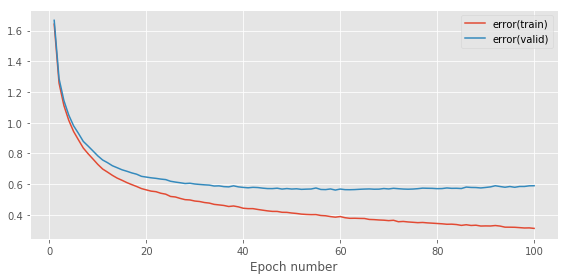

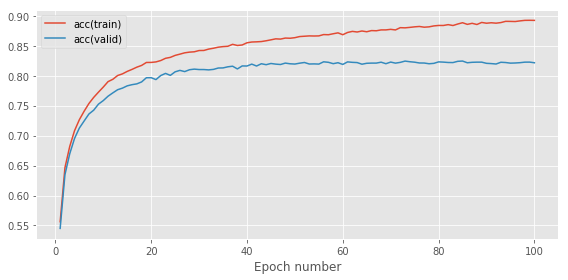

In [3]:
####RMSProp

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError()

# for rate in learning_rates:
#     # Use a basic gradient descent learning rule
#     learning_rule = RMSPropLearningRule(learning_rate=rate)

#     #Remember to use notebook=False when you write a script to be run in a terminal
#     _ = train_model_and_plot_stats(
#         model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    

# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,fileName='cw4_2_RMS_test_{}'.format(learning_rate))

Epoch 1: 4.1s to complete
    error(train)=1.46e+00, acc(train)=5.95e-01, error(valid)=1.49e+00, acc(valid)=5.82e-01


Epoch 2: 4.1s to complete
    error(train)=1.20e+00, acc(train)=6.59e-01, error(valid)=1.23e+00, acc(valid)=6.49e-01


Epoch 3: 4.1s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.10e+00, acc(valid)=6.85e-01


Epoch 4: 4.1s to complete
    error(train)=9.70e-01, acc(train)=7.19e-01, error(valid)=1.01e+00, acc(valid)=7.05e-01


Epoch 5: 4.2s to complete
    error(train)=9.02e-01, acc(train)=7.35e-01, error(valid)=9.49e-01, acc(valid)=7.17e-01


Epoch 6: 4.2s to complete
    error(train)=8.49e-01, acc(train)=7.49e-01, error(valid)=8.96e-01, acc(valid)=7.30e-01


Epoch 7: 4.3s to complete
    error(train)=8.11e-01, acc(train)=7.59e-01, error(valid)=8.63e-01, acc(valid)=7.40e-01


Epoch 8: 4.6s to complete
    error(train)=7.71e-01, acc(train)=7.70e-01, error(valid)=8.26e-01, acc(valid)=7.47e-01


Epoch 9: 4.7s to complete
    error(train)=7.38e-01, acc(train)=7.78e-01, error(valid)=7.95e-01, acc(valid)=7.56e-01


Epoch 10: 5.3s to complete
    error(train)=7.14e-01, acc(train)=7.84e-01, error(valid)=7.75e-01, acc(valid)=7.62e-01


Epoch 11: 4.3s to complete
    error(train)=6.87e-01, acc(train)=7.91e-01, error(valid)=7.51e-01, acc(valid)=7.70e-01


Epoch 12: 4.3s to complete
    error(train)=6.67e-01, acc(train)=7.95e-01, error(valid)=7.35e-01, acc(valid)=7.73e-01


Epoch 13: 4.4s to complete
    error(train)=6.50e-01, acc(train)=8.01e-01, error(valid)=7.19e-01, acc(valid)=7.76e-01


Epoch 14: 4.4s to complete
    error(train)=6.33e-01, acc(train)=8.05e-01, error(valid)=7.06e-01, acc(valid)=7.82e-01


Epoch 15: 4.4s to complete
    error(train)=6.19e-01, acc(train)=8.08e-01, error(valid)=6.96e-01, acc(valid)=7.83e-01


Epoch 16: 4.4s to complete
    error(train)=6.03e-01, acc(train)=8.10e-01, error(valid)=6.83e-01, acc(valid)=7.86e-01


Epoch 17: 4.4s to complete
    error(train)=5.91e-01, acc(train)=8.15e-01, error(valid)=6.74e-01, acc(valid)=7.90e-01


Epoch 18: 4.3s to complete
    error(train)=5.81e-01, acc(train)=8.18e-01, error(valid)=6.63e-01, acc(valid)=7.92e-01


Epoch 19: 4.3s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=6.53e-01, acc(valid)=7.96e-01


Epoch 20: 4.5s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=6.45e-01, acc(valid)=7.97e-01


Epoch 21: 4.4s to complete
    error(train)=5.46e-01, acc(train)=8.27e-01, error(valid)=6.40e-01, acc(valid)=7.98e-01


Epoch 22: 4.3s to complete
    error(train)=5.42e-01, acc(train)=8.29e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


Epoch 23: 4.4s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=6.26e-01, acc(valid)=8.04e-01


Epoch 24: 4.4s to complete
    error(train)=5.23e-01, acc(train)=8.33e-01, error(valid)=6.24e-01, acc(valid)=8.01e-01


Epoch 25: 4.4s to complete
    error(train)=5.17e-01, acc(train)=8.35e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


Epoch 26: 4.5s to complete
    error(train)=5.07e-01, acc(train)=8.37e-01, error(valid)=6.12e-01, acc(valid)=8.06e-01


Epoch 27: 4.5s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=6.13e-01, acc(valid)=8.02e-01


Epoch 28: 4.5s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=6.08e-01, acc(valid)=8.06e-01


Epoch 29: 4.4s to complete
    error(train)=4.89e-01, acc(train)=8.42e-01, error(valid)=6.03e-01, acc(valid)=8.09e-01


Epoch 30: 4.5s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.95e-01, acc(valid)=8.09e-01


Epoch 31: 4.4s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=6.02e-01, acc(valid)=8.09e-01


Epoch 32: 4.5s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.93e-01, acc(valid)=8.11e-01


Epoch 33: 4.7s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.86e-01, acc(valid)=8.11e-01


Epoch 34: 4.7s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 35: 4.8s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.85e-01, acc(valid)=8.13e-01


Epoch 36: 4.8s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.81e-01, acc(valid)=8.13e-01


Epoch 37: 4.9s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 38: 4.7s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.79e-01, acc(valid)=8.14e-01


Epoch 39: 4.5s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.79e-01, acc(valid)=8.13e-01


Epoch 40: 4.4s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


Epoch 41: 4.4s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.72e-01, acc(valid)=8.19e-01


Epoch 42: 4.4s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.69e-01, acc(valid)=8.17e-01


Epoch 43: 4.4s to complete
    error(train)=4.24e-01, acc(train)=8.59e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 44: 4.4s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 45: 4.4s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


Epoch 46: 4.4s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 47: 4.5s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


Epoch 48: 4.4s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


Epoch 49: 4.5s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


Epoch 50: 4.5s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 51: 4.4s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=5.60e-01, acc(valid)=8.19e-01


Epoch 52: 4.4s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=5.61e-01, acc(valid)=8.18e-01


Epoch 53: 4.3s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


Epoch 54: 4.3s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 55: 4.4s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 56: 4.4s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 57: 4.4s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


Epoch 58: 4.6s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 59: 4.5s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 60: 4.7s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 61: 4.9s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01


Epoch 62: 5.7s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


Epoch 63: 4.9s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 64: 4.5s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


Epoch 65: 4.5s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


Epoch 66: 4.5s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 67: 4.5s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 68: 4.5s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


Epoch 69: 4.5s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 70: 4.6s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 71: 4.6s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 72: 4.5s to complete
    error(train)=3.51e-01, acc(train)=8.82e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 73: 4.6s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 74: 4.7s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


Epoch 75: 4.7s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


Epoch 76: 4.8s to complete
    error(train)=3.43e-01, acc(train)=8.82e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 77: 4.9s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


Epoch 78: 5.0s to complete
    error(train)=3.39e-01, acc(train)=8.83e-01, error(valid)=5.59e-01, acc(valid)=8.26e-01


Epoch 79: 4.8s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


Epoch 80: 4.8s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 81: 4.8s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 82: 4.7s to complete
    error(train)=3.31e-01, acc(train)=8.86e-01, error(valid)=5.56e-01, acc(valid)=8.26e-01


Epoch 83: 4.7s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


Epoch 84: 4.7s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.68e-01, acc(valid)=8.22e-01


Epoch 85: 4.7s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 86: 4.8s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


Epoch 87: 4.9s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 88: 4.8s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


Epoch 89: 4.7s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=5.68e-01, acc(valid)=8.23e-01


Epoch 90: 4.6s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 91: 4.7s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.62e-01, acc(valid)=8.26e-01


Epoch 92: 4.7s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.63e-01, acc(valid)=8.24e-01


Epoch 93: 4.6s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.64e-01, acc(valid)=8.24e-01


Epoch 94: 4.7s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=5.66e-01, acc(valid)=8.24e-01


Epoch 95: 4.7s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


Epoch 96: 4.9s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=5.64e-01, acc(valid)=8.24e-01


Epoch 97: 4.9s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=5.66e-01, acc(valid)=8.24e-01


Epoch 98: 4.8s to complete
    error(train)=3.07e-01, acc(train)=8.95e-01, error(valid)=5.64e-01, acc(valid)=8.25e-01


Epoch 99: 4.8s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


Epoch 100: 4.7s to complete
    error(train)=3.06e-01, acc(train)=8.94e-01, error(valid)=5.69e-01, acc(valid)=8.24e-01


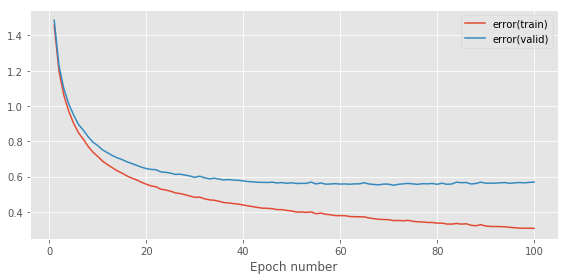

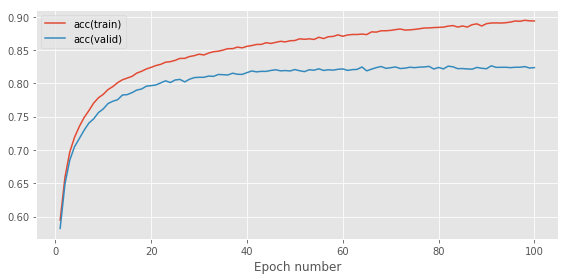

In [4]:
#Adam

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,fileName='cw4_2_Adam_test_{}'.format(learning_rate))